# Visualização dos dados dos datasets

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

A classe ```Dialog``` é uma cortesia do meu amigo [@h80r](https://github.com/h80r/)

In [91]:
class Dialog:
  def __init__(self, *lines: str, header: str = None, footer: str = None):
    self.lines = lines
    self.max_len = max(map(lambda x: len(x), lines))
    if header != None:
      self.header = header
      self.max_len = max(self.max_len, len(header))
    if footer != None:
      self.footer = footer
      self.max_len = max(self.max_len, len(footer))
    self.max_len += 2

  def show(self):
    self.print_division('┌', '┐')
    if hasattr(self, 'header'):
      self.print_text(self.header)
      self.print_division('├', '┤')
    for line in self.lines:
      self.print_text(line)
    if hasattr(self, 'footer'):
      self.print_division('├', '┤')
      self.print_text(self.footer)
    self.print_division('└', '┘')

  def print_division(self, begin: str, end: str):
    print(begin + '─' * self.max_len + end)

  def print_text(self, text: str):
    print('│' + text.center(self.max_len, ' ') + '│')

# Sobre o tratamento dos dados

De acordo com quem distribuiu os dados, não há quaisquer valor nulo. Então não houve a necessidade de um ```dropna()```.

Entretanto, o **csv** vem com o delimitador usando ```;```, que quebra a leitura do arquivo. Foram substituídas manualmente os ```;``` por ```,```, mas uma opção seria utilizar o ```pd.read_csv(path, sep=';')```.

In [18]:
red_wine_path = './dataset/winequality-red.csv'
white_wine_path = './dataset/winequality-white.csv'

red_wine_df = pd.read_csv(red_wine_path)
white_wine_df = pd.read_csv(white_wine_path)


A seguinte célula mostra algumas informações sobre os datasets no formato do DataFrame.

Foi implementado uma função que escolhe quais valores vão ser mostrados.

In [55]:
@interact_manual
def show_what_op(show=['red description', 'white description', 'red', 'white']):
    if show == 'red description':
        return red_wine_df.describe()
    elif show == 'white description':
        return white_wine_df.describe()
    elif show == 'red':
        return red_wine_df.head()
    else:
        return white_wine_df.head()


interactive(children=(Dropdown(description='show', options=('red description', 'white description', 'red', 'wh…

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

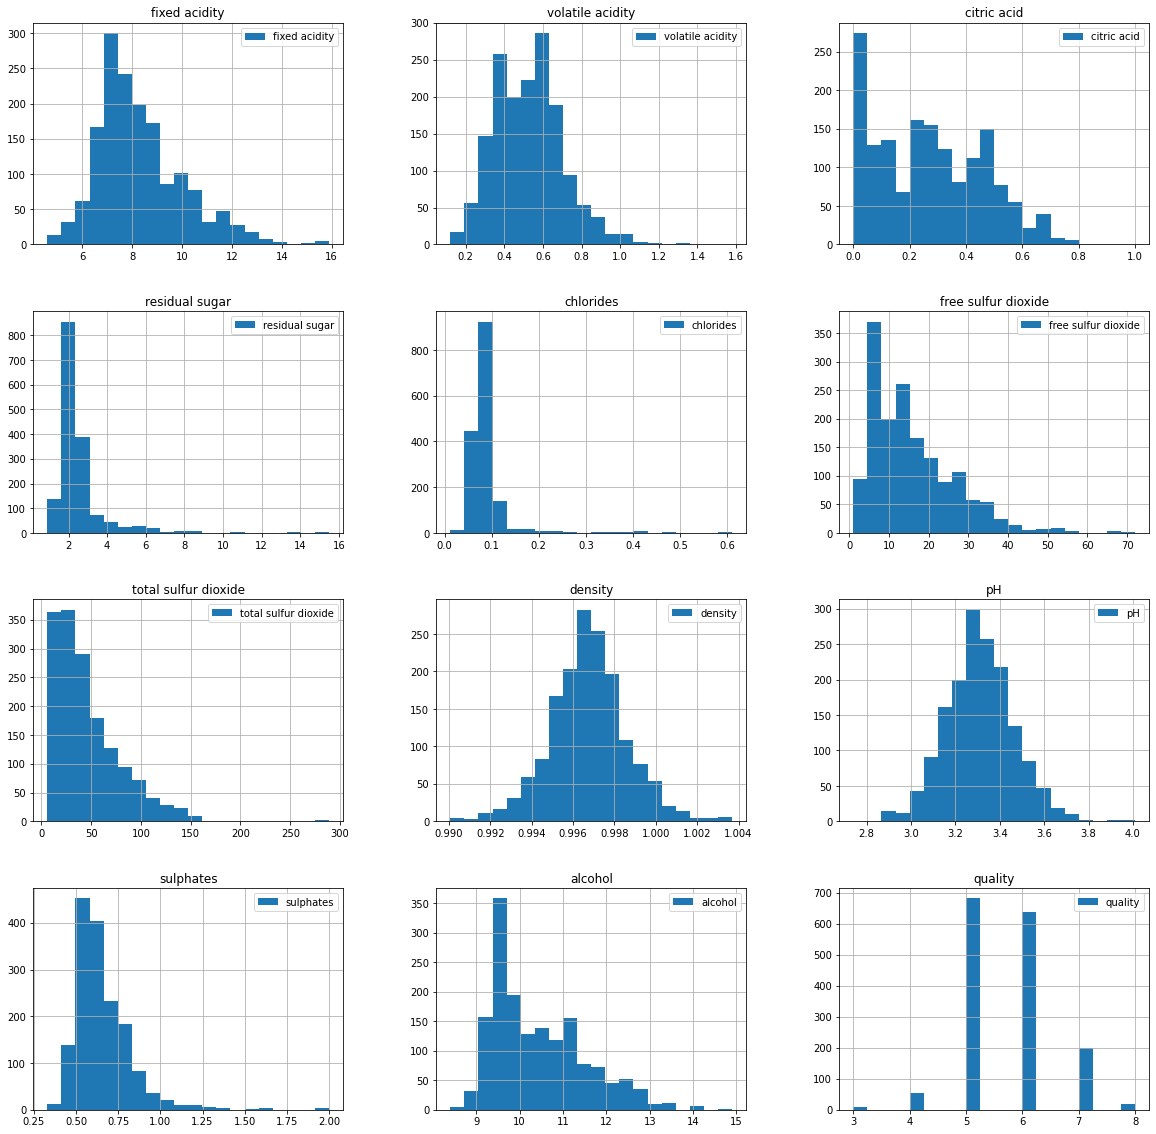

In [76]:
red_wine_df.hist(bins=20, figsize=(20,20), legend=True)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

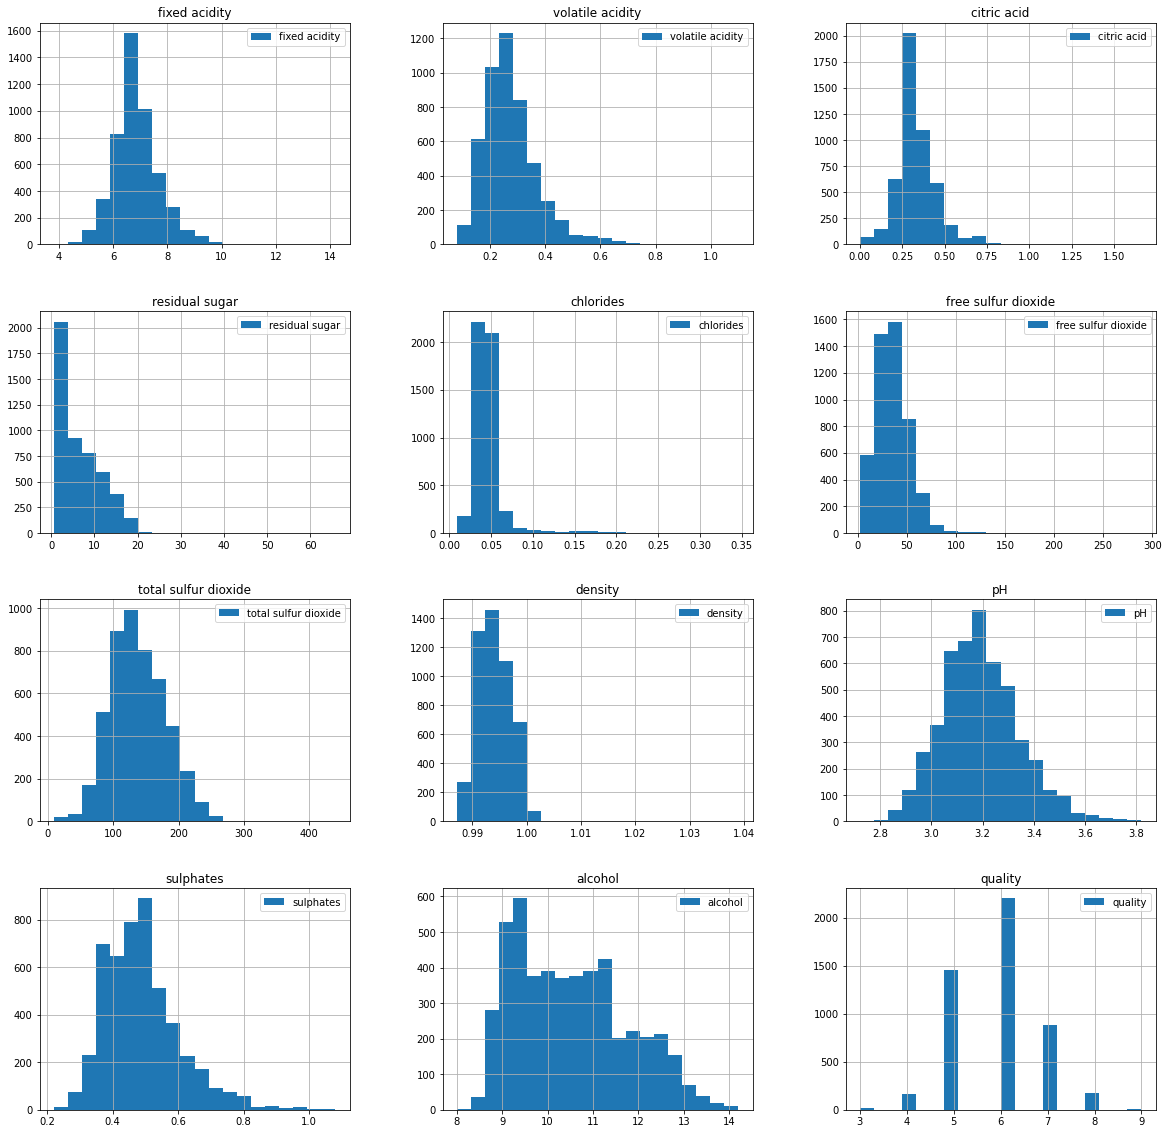

In [78]:
white_wine_df.hist(bins=20, figsize=(20,20), legend=True)        

<AxesSubplot:title={'center':'Mapa de calor para o vinho tinto'}>

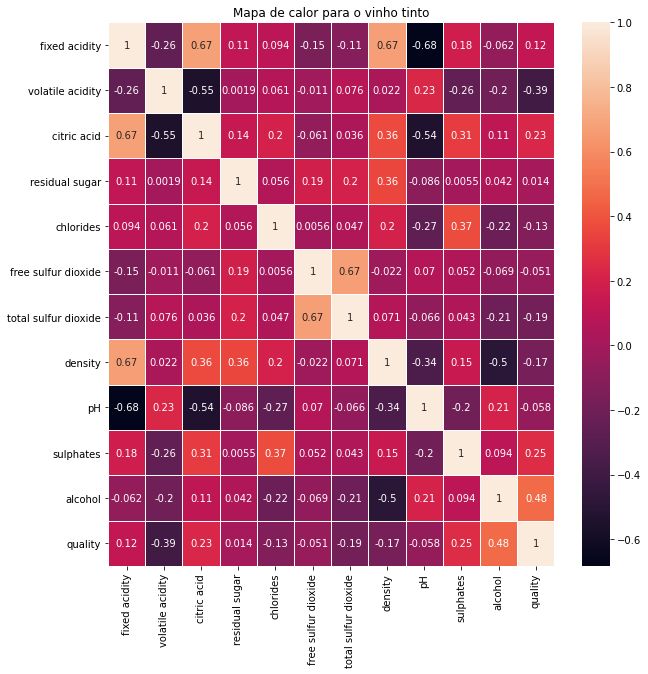

In [81]:
red_wine_corr_matrix = red_wine_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
plt.title('Mapa de calor para o vinho tinto')
sns.heatmap(red_wine_corr_matrix, annot=True, linewidths=.8, ax=ax)

<AxesSubplot:title={'center':'Mapa de calor para o vinho branco'}>

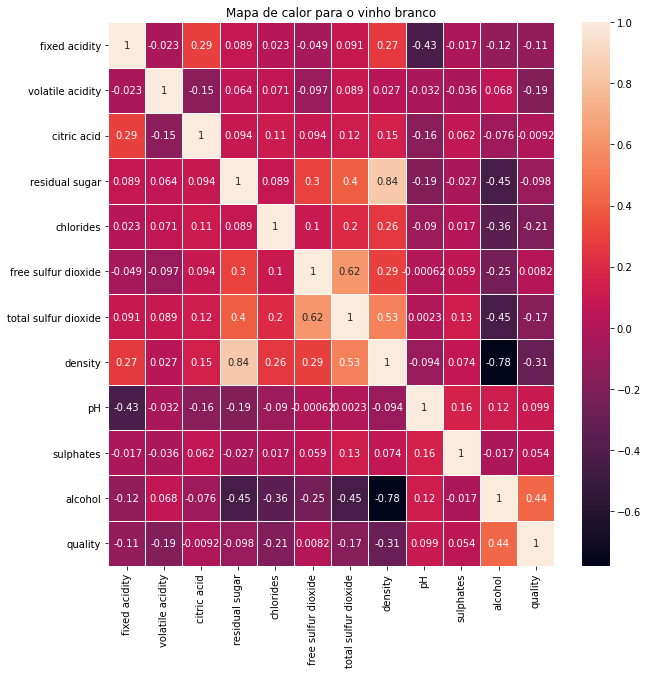

In [84]:
white_wine_corr_matrix = white_wine_df.corr()

fig, ax = plt.subplots(figsize=(10,10))
plt.title('Mapa de calor para o vinho branco')
sns.heatmap(white_wine_corr_matrix, annot=True, linewidths=.8, ax=ax)

In [94]:
print('Vinho Branco')
print(white_wine_corr_matrix['quality'].sort_values(ascending=False))
print()
print('Vinho Tinto')
print(red_wine_corr_matrix['quality'].sort_values(ascending=False))

Vinho Branco
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Vinho Tinto
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### Notas

Parece que há uma correlação entre:
- Vinho tinto
    - qualidade
    - teor alcoolico
    - sulfatos
    - ácido citrico
    - acidez fixada 

- Vinho branco
    - qualidade
    - teor alcoolico
    - sulfatos
    - pH